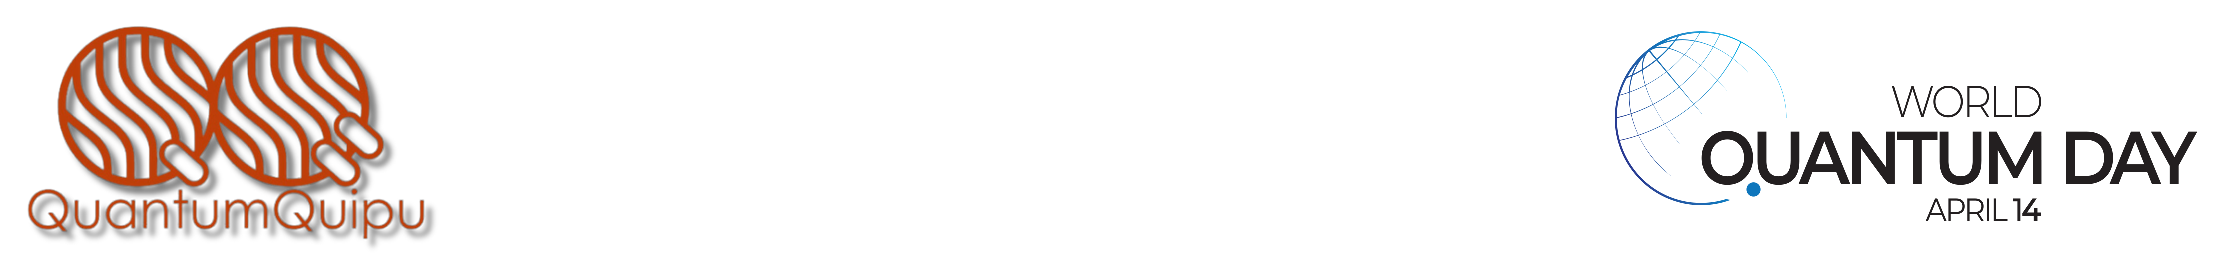

<table style="background-color: transparent;">
    <tr style="background-color: transparent; text-align:center;">
        <td width="100%" align="center"><font size="6" color="#0433BF">Hands-On-Quantum</font></td>
    </tr>
    <tr style="background-color: transparent; text-align:center;">
        <td width="100%"><font size="5" color="#0433BF">Programando en una Computadora Cuántica real</font></td>
    </tr>
</table>

$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\mymatrix}[2]{\left[ \begin{array}{#1} #2\end{array} \right]} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $

<div align="right" style=\font-size: 15px; font-weight: normal;">Por Claudia Zendejas-Morales&#160;&#160;</div>

</br>

<table style="background-color: transparent;" align="right">
    <tr style="background-color: transparent;">
        <td width="100%">
            <a target="_blank" href="https://opensource.org/licenses/Apache-2.0">
              <img src="https://img.shields.io/badge/license-Apache--2.0-green" alt="Licencia Apache 2.0">
            </a>
            &#160;&#160;
            <a target="_blank" href="https://colab.research.google.com/drive/1VZ1czTHklelUYt8WD8lQwQc04LbvX1Rg?usp=sharing">
              <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
            </a>
        </td>
    </tr>
</table>

## Contenido

1. [Introducción](#1)
   1. [Instalación](#1.1)
2. [Qubit](#2)
   1. [Representación de los qubits: Matemáticamente](#2.1)
   2. [Representación de los qubits: Esfera de Bloch](#2.2)
   3. [Representación de los qubits: Qiskit](#2.3)
3. [Circuito Cuántico](#3)
   1. [Orden de los qubits](#3.1)
4. [Compuerta Cuántica](#4)
   1. [Representación de las compuertas: Matemáticamente](#4.1)
   2. [Compuertas de un sólo qubit](#4.2)
   3. [Compuertas de múltiples qubits](#4.3)
5. [Simular circuitos cuánticos](#5)
   1. [Primitivas de Qiskit Runtime](#5.1)
6. [Ejecutar en Hardware Cuántico](#6)
   1. [Ejemplo: Sumador Completo Cuántico](#6.1)

<a id="1"></a>
# 1. Introducción

**Hardware Cuántico**: Conjunto de dispositivos y sistemas físicos diseñados para manipular y controlar estados cuánticos con el propósito de realizar cálculos. Estos sistemas aprovechan propiedades únicas de la mecánica cuántica, como la superposición, el entrelazamiento y la interferencia cuántica, para procesar información de manera fundamentalmente diferente a la de los sistemas de computación clásicos.

En este notebook usamos el framework [Qiskit](https://www.ibm.com/quantum/qiskit) para acceder a las computadoras cuánticas reales de [IBM Quantum](https://quantum.ibm.com/). es necesario crear una cuenta en esta plataforma, la cual provee un plan gratuito, por lo que, es posible realizar pruebas en las computadoras de IBM.

<a id="1.1"></a>
## 1.1. Instalación

Se deben instalar los siguientes paquetes.

Al instalar desde un Jupyer Notebook, es usual usar `!` antes del comando `pip` para que la ejecución sea reconocida como un comando del shell y no como código de Python.

Descomentar todas las líneas de la siguiente celda y ejecutarla para proceder con la instalación.

In [1]:
#!pip install qiskit
#!pip install matplotlib
#!pip install qiskit_ibm_runtime
#!pip install pylatexenc

Comprobar que Qiskit está instalado: importar el paquete y verificar la versión:

In [2]:
import qiskit

In [3]:
qiskit.__version__

'1.0.2'

<a id="2"></a>
# 2. Qubit

Al igual que en las computadoras digitales estándar (computadoras clásicas) la unidad fundamental son los **bits**, en las computadoras cuánticas tenemos a los **qubits**, una extensión del bit a la mecánica cuántica.

Una definición más precisa de **qubit** sería:

<div class="alert alert-block alert-success">
Un qubit es un sistema mecánico cuántico de dos estados (o dos niveles) que pertenece a un espacio de Hilbert bidimensional ($\mathbb{C}^2$).

Un [espacio de Hilbert](https://en.wikipedia.org/wiki/Hilbert_space) es un [espacio vectorial](https://en.wikipedia.org/wiki/Vector_space) que define un producto interior. El espacio vectorial ocupado para definir a los qubits utiliza el campo de los números complejos $\mathbb{C}$ y como deseamos que sea bidimensional, es que se expresa como $\mathbb{C}^2$, es decir, necesitamos **2 números complejos** para describir a un **qubit**.

<a id="2.1"></a>
## 2.1. Representación de los qubits: Matemáticamente

Para representar a los qubits de manera matemática, se utiliza la **[notación de Dirac](https://en.wikipedia.org/wiki/Bra%E2%80%93ket_notation)**, también conoida como notación *bra-ket*.

El estado $\ket{0}$ se pronuncia "**ket 0**", y el estado $\ket{1}$ es "**ket 1**". Esto dos estados (o qubits) son ortogonales entre sí y forman una base $\{\ket{0}, \ket{1}\}$, llamada **base computacional**, debido a que abarcan el [espacio vectorial](https://en.wikipedia.org/wiki/Vector_space) lineal bidimensional (espacio de Hilbert, $\mathbb{C}^2$) del qubit.

La notación de Dirac es una manera corta de escribir **vectores**. Hemos dicho que un qubit es un estado de dos niveles, y para representar qué tanto tenemos de cada nivel, necesitamos un vector de dos dimensiones. La manera más general de escribir un estado cuántico (un quibit) es entonces:

$$\ket{\psi}=\left[ \begin{array}{r} \alpha \\ \beta\end{array} \right]$$

donde $\alpha,\beta\in\mathbb{C}$ y el ket $\ket{\psi}$ es la forma corta de escribir el estado de dos niveles (el vector).

En el caso de los elementos de la base computacional $\{\ket{0}, \ket{1}\}$, representan a los *vectores de estado* siguientes:

$$\ket{0}=\left[ \begin{array}{r} 1 \\ 0 \end{array} \right] ~~~~~~~~~~~~~~~~~~~~ \ket{1}=\left[ \begin{array}{r} 0 \\ 1 \end{array} \right]$$

Entonces, un qubit, es una superposición de los estados base, es decir, un qubit puede ser expresado como la [combinación lineal](https://en.wikipedia.org/wiki/Linear_combination) de $\ket{0}$ y $\ket{1}$:

$$\ket{\psi}=\alpha\ket{0}+\beta\ket{1}$$

donde $\alpha$ y $\beta$ son [amplitudes de probabilidad](https://en.wikipedia.org/wiki/Probability_amplitude). Cuando medimos este qubit, en la base computacional, la probabiliadad de obtener el estado $\ket{0}$ es de $|\alpha|^2$ y la probabilidad de obtener el estado $\ket{1}$ es de $|\beta|^2$. Debido a que los cuadrados de los valores absolutos de las amplitudes equivalen a probabilidades, se deduce que $\alpha$ y $\beta$ deben estar restringidos de acuerdo con el [segundo axioma de la teoría de la probabilidad](https://en.wikipedia.org/wiki/Probability_axioms#Second_axiom) mediante la ecuación:

$$|\alpha|^2 + |\beta|^2 = 1$$

**Nota**: Dada esta restrición, notemos que la longitud de los vectores siempre será igual a $1$.

<div class="alert alert-block alert-info">
<strong>Ejemplo</strong>:

$$\ket{\psi}=\frac{\sqrt{3}}{2}\ket{0}+\frac{1}{2}\ket{1}=\left[ \begin{array}{c} \dfrac{\sqrt{3}}{2} \\\\ \dfrac{1}{2} \end{array} \right]$$

La probabilidad de observar el estado $\ket{0}$ es de $\left|\dfrac{\sqrt{3}}{2}\right|^2=\dfrac{3}{4}$, que es $75\%$.
    
La probabilidad de observar el estado $\ket{1}$ es de $\left|\dfrac{1}{2}\right|^2=\dfrac{1}{4}$, que es $25\%$.
    
La suma de las probabilidades para cada caso: $\dfrac{3}{4}+\dfrac{1}{4}=1$, que es $100\%$.

<a id="2.2"></a>
## 2.2. Representación de los qubits: Esfera de Bloch

¿Qué pasa si las amplitudes de los qubits ya no son solo números reales?

Entonces serán números complejos, como se mencionó anteriormente, es decir $b\neq 0$, teniendo así tanto la parte real como la imaginaria: $z=a+bi$.

Debido a que un qubit se escribe,

$$\ket{\psi}=\left[ \begin{array}{r} \alpha \\ \beta \end{array} \right]$$

con $\alpha,\beta\in\mathbb{C}$, es decir, necesita dos números complejos, y a su vez cada número complejo necesita de 2 números reales para poder escribirlo, entonces, necesitamos en total $4$ números reales para representar a un qubit.

$$\alpha=a+bi$$

$$\beta=c+di$$

donde $a,b,c,d \in \mathbb{R}$.

Podría parecer a primera vista que se tienen $4$ grados de libertad para un qubit, sin embargo, un grado de libertad deja de ser *libre* debido a la restricción de normalización: $|\alpha|^2 + |\beta|^2 = 1$. Tenemos ahora 3 grados de libertad.

Entonces, utilizando una *transformación* de coordenadas conveniente, se puede eliminar ese grado de libertad, es decir, lograr la conversión de $\mathbb{R}^4\rightarrow\mathbb{R}^3$. Una elección posible son las [coordenadas de Hopf](https://en.wikipedia.org/wiki/3-sphere#Hopf_coordinates), que manda el espacio de $4$ dimensiones a la superficie de una esfera unitaria en $3$ dimensiones.

Después de considerar que para un qubit, una *fase global* del estado no tiene consecuencias físicamente observables, se obtiene la **esfera de Bloch** (más detalles [aquí](https://en.wikipedia.org/wiki/Qubit#Bloch_sphere_representation)).

<div class="alert alert-block alert-success">
La esfera de Bloch es una representación geométrica de un sistema mecánico cuántico de dos niveles (un quibit).

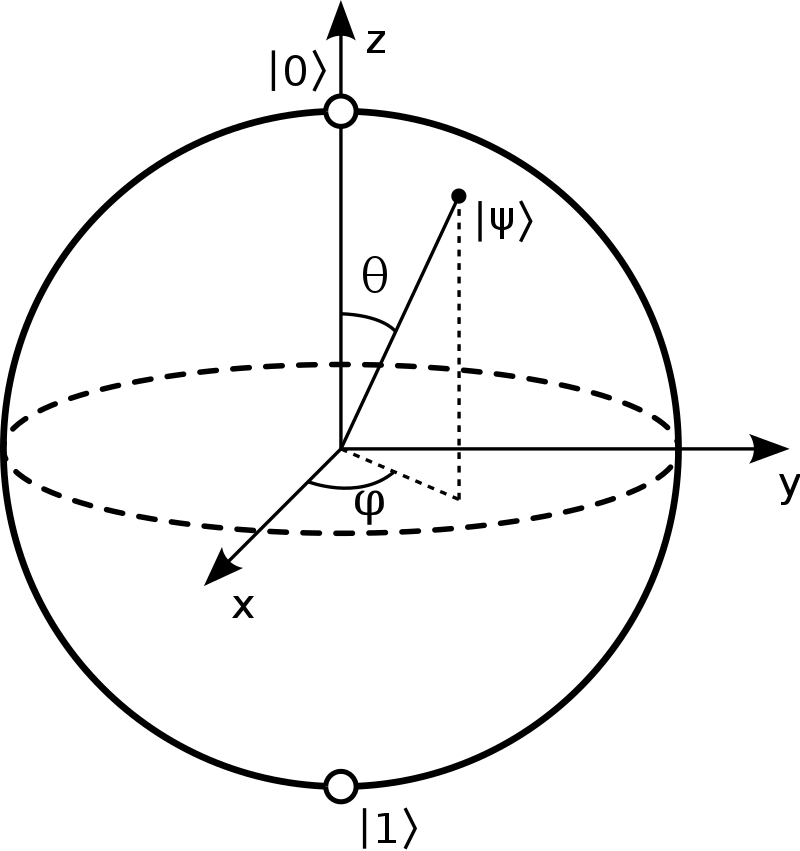

<p style="font-size:10px;font-style:italic;text-align:right"><a href="https://en.wikipedia.org/wiki/Bloch_sphere" target="_blank">Imagen obtenida de Wikipedia</a></p>

Entonces, el estado cuántico, en términos de la esfera de Bloch, se escribe como,

$$\begin{aligned}
\ket{\psi}&=\cos\left(\frac{\theta}{2}\right) \, \ket{0}+e^{i\varphi}\sin\left(\frac{\theta}{2}\right) \, \ket{1}\\\\\\
&=\cos\left(\frac{\theta}{2}\right)\left[ \begin{array}{r} 1 \\ 0 \end{array} \right] + e^{i\varphi}\sin\left(\frac{\theta}{2}\right)\left[ \begin{array}{r} 0 \\ 1 \end{array} \right]\\\\
&=\left[ \begin{array}{r} \cos\left(\frac{\theta}{2}\right) \\ e^{i\varphi}\sin\left(\frac{\theta}{2}\right) \end{array} \right]
\end{aligned}$$

donde 

$$0\leq\theta\leq\pi$$

$$0\leq\varphi < 2\pi$$

Entonces, la transformación es,

$$\alpha=\cos\left(\frac{\theta}{2}\right)$$

$$\beta=e^{i\varphi}\sin\left(\frac{\theta}{2}\right)$$

Notemos que bajo esta transformación, $\alpha\in\mathbb{R}$ y $\beta\in\mathbb{C}$.

$$$$

**Nota**: Los parámetros $\theta$ y $\varphi$, respectivamente pueden ser reinterpretados en coordenadas esféricas como la [colatitud](https://en.wikipedia.org/wiki/Colatitude) con respecto al eje $z$ y la [longitud](https://en.wikipedia.org/wiki/Longitude) con respecto al eje $x$. Es decir, $(x,y,z)=(\sin\theta\cos\varphi, \sin\theta\sin\varphi, \cos\theta)$ con $r=1.$

$$$$

En la esfera de Bloch, los [puntos antipodales](https://en.wikipedia.org/wiki/Antipodal_point) corresponden a un par de vectores de estado mutuamente ortogonales. El *polo norte* y el *polo sur* de la esfera de Bloch generalmente se eligen para que correspondan a los vectores base estándar $\ket{0}$ y $\ket{1}$ (canónicos), respectivamente, que a su vez podría corresponder, por ejemplo, a los estados de 'espín arriba' y 'espín abajo' de un electrón, a veces escritos como: $\ket{\uparrow}$ y $\ket{\downarrow}$. Sin embargo, esta **elección es arbitraria**.

Entonces, los estados $\ket{0}$ y $\ket{1}$ en los polos norte y sur, son **espacialmente antiparalelos** (lo que observamos en la esfera de Bloch), pero **en el espacio de Hilbert son ortogonales**.

En efecto, es un poco confuso tener dos nociones diferentes de "ortogonal", una para el espacio físico y otra para el espacio de Hilbert, pero esto viene del hecho de tener dos espacios diferentes en los que debemos pensar.

<a id="2.3"></a>
## 2.3. Representación de los qubits: Qiskit

En Qiskit podemos crear qubits con la clase `QuantumRegister` como sigue:

In [4]:
from qiskit import QuantumRegister

qubit1 = QuantumRegister(1)         # el parámetro indica cuántos qubits queremos

qubit2 = QuantumRegister(1, 'qreg') # se puede indicar un nombre al registro cuántico (parámetro opcional)

In [5]:
print(qubit1) # al no especificar el nombre, le asigna uno con una numeración consecutiva
print(qubit2)

QuantumRegister(1, 'q0')
QuantumRegister(1, 'qreg')


La base que usa **Qiskit**, es la **base computacional**: $\{\ket{0}, \ket{1}\}$.

<a id="3"></a>
# 3. Circuito Cuántico

Debemos tener en dónde usar los qubits, para eso tenemos al **circuito cuántico**.

<div class="alert alert-block alert-success">
Un circuito cuántico es un modelo de computación cuántica, similar a los circuitos clásicos, en los que una computación es una secuencia de compuertas cuánticas, mediciones, inicializaciones de qubits a valores conocidos y posiblemente otras acciones.

El conjunto mínimo de acciones que un circuito debe poder realizar en los qubits para permitir la computación cuántica se conoce como los [criterios de DiVincenzo](https://en.wikipedia.org/wiki/DiVincenzo%27s_criteria).

Este tipo de circuitos se escriben de manera en que el eje horizontal representa al tiempo, comenzando en el lado izquierdo y terminando en el derecho. Las líneas horizontales son qubits, las líneas dobles representan bits clásicos. Los elementos que están conectados por estas líneas son operaciones realizadas en los qubits, como mediciones o compuertas.

Veamos cómo incluir en un circuito uno de los qubits que creamos anteriormente:

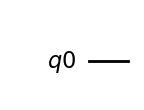

In [6]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(qubit1) # crear un circuito cuántico con un qubit (previamente definido)

circuit.draw('mpl')              # mostramos la representación gráfica del circuito

En el siguiente ejemplo se define un circuito cuántico con 3 qubits, los cuales no tienen que ser creados necesariamente usando la clase `QuantumRegister`, sino que basta con indicar la cantidad de qubits que deseamos tenga el circuito, también se definen 2 bits clásicos (líneas dobles), y se aplican 3 compuertas. Veremos que efecto tiene cada una más adelante.

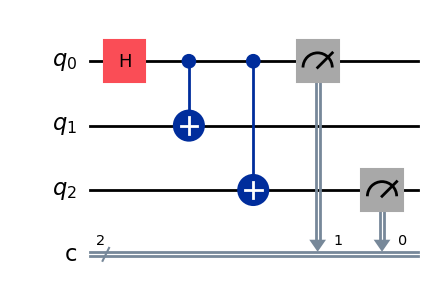

In [7]:
circ = QuantumCircuit(3, 2) # circuito con 3 qubits y 2 bits clásicos

circ.h(0)                   # aplicar compuerta H al qubit 0
circ.cx(0, 1)               # aplicar compuerta CNOT a los qubits 0 y 1
circ.cx(0, 2)               # aplicar compuerta CNOT a los qubits 0 y 2
circ.measure(0, 1)          # medir el qubit 0 en el bit clásico 1
circ.measure(2, 0)          # medir el qubit 2 en el bit clásico 0

circ.draw('mpl')            # mostrar el circuito

Como se mencionó, el tiempo ocurre de izquierda a derecha, entonces la compuerta $H$ es la que se aplica primero, y después la compuerta $CNOT_{0,1}$ y por último la compuerta $CNOT_{0,2}$, al final ocurren las mediciones.

Un importante punto a resaltar, es que *todos los qubits comienzan en el estado $\ket{0}$* (parte de los criterios de DiVincenzo).

<a id="3.1"></a>
## 3.1. Orden de los qubits

En el circuito anterior se tienen 3 qubits: $q_0$, $q_1$ y $q_2$. Dado el subíndice podemos saber cual de ellos es el primero, el segundo y el tercero. Pero al momento de hacer la relación con las expresiones matemáticas, debemos tomar en cuenta que, un estado de tres qubits tendrá el siguiente orden (respecto a la convención de Qiskit),

$$\ket{q_2 \, q_1 \, q_0}=\ket{000}$$

<a id="4"></a>
# 4. Compuerta Cuántica

Una vez que tenemos qubits en un circuito cuántico, lo siguiente es manipularlos, para lograr un objetivo, implementar algoritmos cuánticos. Esta manipulación de hace con las **compuertas cuánticas**.

<div class="alert alert-block alert-success">
Las compuertas cuánticas son operadores unitarios y se describen como matrices unitarias en relación con alguna base. Usualmente se usa la base computacional. 

Las compuertas cuánticas son los componentes básicos de los circuitos cuánticos, como lo son las compuertas lógicas clásicas para los circuitos digitales convencionales. A diferencia de muchas compuertas lógicas clásicas, las compuertas lógicas cuánticas son **reversibles**.

<a id="4.1"></a>
## 4.1. Representación de las compuertas: Matemáticamente

Una compuerta cuántica que actúa sobre $n$ qubits, esta representada por una matriz unitaria de $2^n\times 2^n$. Los vectores que representan estados cuánticos de dos niveles (qubits) sobre los que actúan las compuertas son vectores unitarios en $2^n$ dimensiones.

Las compuertas cuánticas más comunes operan en espacios vectoriales de uno o dos qubits, al igual que las compuertas lógicas clásicas comunes operan en uno o dos bits.

La acción de una compuerta en un estado cuántico específico se encuentra multiplicando el vector $\ket{\psi_1}$ que representa el estado, por la matriz $U$ que representa la compuerta. El resultado es un nuevo estado cuántico $\ket{\psi_2}$:

$$U\ket{\psi_1}=\ket{\psi_2}$$

Cuando tenemos un qubit, $n=1$, el vector que lo representa tiene dos elementos y una compuerta que opera sobre un qubit es una matriz de $2\times 2$, obtener el estado resultante de aplicar la compuerta será como sigue,

$$U\ket{\psi_1}= \mymatrix{rr}{ u_{11} & u_{12} \\ u_{21} & u_{22} }\mymatrix{r}{ \alpha \\ \beta }=\mymatrix{r}{ \alpha \, u_{11} + \beta \, u_{12} \\ \alpha \, u_{21} + \beta \, u_{22} }=\mymatrix{r}{ \alpha' \\ \beta' }=\ket{\psi_2}$$

<a id="4.2"></a>
## 4.2. Compuertas de un sólo qubit

<a id="4.2.1"></a>
### 4.2.1. Compuertas de Pauli

Las **compuertas de Pauli** son las tres [matrices de Pauli](https://en.wikipedia.org/wiki/Pauli_matrices) ($\sigma_x, \sigma_y,\sigma_z$) y actúan sobre un solo quibit. 

Las compuertas $X$, $Y$, $Z$, respectivamente, equivalen a una rotación de $\pi$ radianes (180°) al rededor del eje $x$, $y$, $z$ en la *esfera de Bloch*.

### Compuerta $X$

Esta compuerta es equivalente a la compuerta de negación ($NOT$) en las computadoras clásicas.

También es llamada *bit-flip* ya que mapea los estados base como sigue:

$$X\ket{0} = \ket{1}$$

$$X\ket{1} = \ket{0}$$

Su representación matricial es,

$$X=NOT=\mymatrix{rr}{ 0 & 1 \\ 1 & 0}$$

<div class="alert alert-block alert-info">
<strong>Ejemplo</strong>: Efecto de la compuerta $X$ sobre el estado $\ket{1}$
    
$$X\ket{1}= \mymatrix{rr}{ 0 & 1 \\ 1 & 0 }\mymatrix{r}{ 0 \\ 1 }=\mymatrix{r}{ 1 \\ 0 }=\ket{0}$$

En Qiskit aplicamos la compuerta $X$ con el método `x()`:

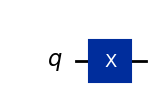

In [8]:
circ1 = QuantumCircuit(1) # circuito con 1 qubit

circ1.x(0)                # aplicar compuerta X al (único) qubit 0

circ1.draw('mpl')         # mostrar el circuito

### Obtener el vector de estado con Qiskit

Con la clase `Statevector` de Qiskit, se puede obtener el estado de un circuito en el punto que se desee:

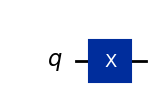

👉 Estado inicial:
➤ en forma de vector:


<IPython.core.display.Latex object>

➤ en forma de ket:


<IPython.core.display.Latex object>


👉 Estado después de X:
➤ en forma de vector:


<IPython.core.display.Latex object>

➤ en forma de ket:


<IPython.core.display.Latex object>

In [9]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import array_to_latex


circ1 = QuantumCircuit(1)    # circuito con 1 qubit

psi_0 = Statevector(circ1)   # estado justo después de crear el circuito

circ1.x(0)                   # aplicar compuerta X al (único) qubit 0

psi_1 = Statevector(circ1)   # estado después aplicar la compuerta X

display(circ1.draw('mpl'))   # mostrar el circuito

print("👉 Estado inicial:")
print("➤ en forma de vector:")
display(array_to_latex(psi_0.data))
print("➤ en forma de ket:")
display(psi_0.draw('latex'))
print()
print("👉 Estado después de X:")
print("➤ en forma de vector:")
display(array_to_latex(psi_1.data))
print("➤ en forma de ket:")
display(psi_1.draw('latex'))

### Visualización en la esfera de Bloch con Qiskit

Con la función `plot_bloch_multivector()` podemos visualizar un qubit, indicando el vector de estado.

🔵 Estado inicial:


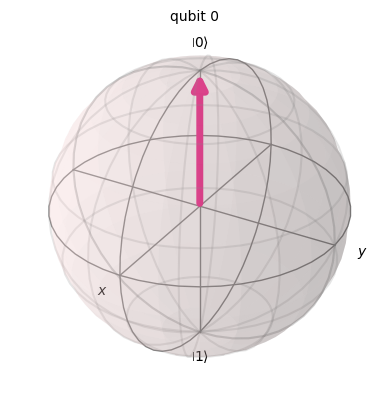

🔵 Estado después de X:


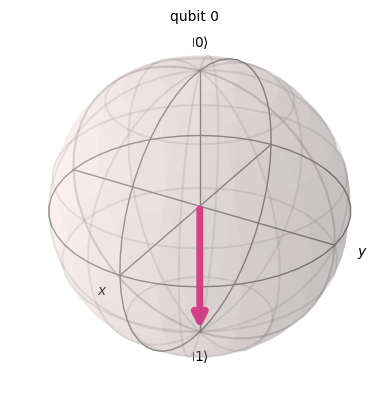

In [10]:
from qiskit.visualization import plot_bloch_multivector


print("🔵 Estado inicial:")
display(plot_bloch_multivector(psi_0))

print("🔵 Estado después de X:")
display(plot_bloch_multivector(psi_1))

### Compuerta $Y$

Esta compuerta mapea los estados base como sigue:

$$Y\ket{0}=i\ket{1}$$
$$Y\ket{1}=-i\ket{0}$$

Su representación matricial es,

$$Y=\mymatrix{rr}{ 0 & -i \\ i & 0}$$

<div class="alert alert-block alert-info">
<strong>Ejemplo</strong>: Efecto de la compuerta $Y$ sobre el estado $\ket{+}$

Con notación de Dirac:
    
$$Y\ket{+}=Y \, \left(\dfrac{1}{\sqrt2}\Big(\ket{0}+\ket{1}\Big)\right)=\dfrac{1}{\sqrt2}\Big(Y\ket{0}+Y\ket{1}\Big)=\dfrac{1}{\sqrt2}\Big(i\ket{1}-i\ket{0}\Big)=\dfrac{-i}{\sqrt2}\Big(\ket{0}-\ket{1}\Big)=-i\ket{-}$$

Con notación matricial:
    
$$Y\ket{+}= \mymatrix{rr}{ 0 & -i \\ i & 0 }\mymatrix{r}{ \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} }=\mymatrix{r}{ \frac{-i}{\sqrt{2}} \\ \frac{i}{\sqrt{2}} }=-i\mymatrix{r}{ \frac{1}{\sqrt{2}} \\ \frac{-1}{\sqrt{2}} }=-i\ket{-}$$

En Qiskit aplicamos la compuerta $Y$ con el método `y()`:

### Compuerta $Z$

Esta compuerta mapea los estados base como sigue:

$$Z\ket{0}=\ket{0}$$
$$Z\ket{1}=-\ket{1}$$

Su representación matricial es,

$$Z=\mymatrix{rr}{ 1 & 0 \\ 0 & -1}$$

En Qiskit aplicamos la compuerta $Z$ con el método `z()`:

<a id="4.2.2"></a>
### 4.2.2. Rotaciones con otros ángulos

Las compuertas de Pauli son rotaciones de $\pi$ radianes, pero podemos hacer que el estado cuántico rote con otros ángulos, para ello, tenemos las compuertas de rotaciones, alrededor de los ejes, definidas como sigue:

$$R_x(\phi) =\mymatrix{rr}{ \cos\left(\frac{\phi}{2}\right) & -i\sin\left(\frac{\phi}{2}\right) \\ -i\sin\left(\frac{\phi}{2}\right) & \cos\left(\frac{\phi}{2}\right) }=\cos\left(\frac{\phi}{2}\right) \, I-i\sin\left(\frac{\phi}{2}\right) \, X$$

$$R_y(\phi) =\mymatrix{rr}{ \cos\left(\frac{\phi}{2}\right) & -\sin\left(\frac{\phi}{2}\right) \\ \sin\left(\frac{\phi}{2}\right) & \cos\left(\frac{\phi}{2}\right) }=\cos\left(\frac{\phi}{2}\right) \, I-i\sin\left(\frac{\phi}{2}\right) \, Y$$

$$R_z(\phi) =\mymatrix{cc}{ e^{-i\frac{\phi}{2}} & 0 \\ 0 & e^{i\frac{\phi}{2}} }=\cos\left(\frac{\phi}{2}\right) \, I-i\sin\left(\frac{\phi}{2}\right) \, Z$$

En Qiskit existen los métodos `rx()`, `ry()` y `rz()` para lograr las rotaciones con diferentes ángulos.

<a id="4.2.3"></a>
### 4.2.3. Compuerta Hadamard

La compuerta Hadamard crea un estado de superposición de la base computacional $\{\ket{0}, \ket{1}\}$, entonces mapea los estados como sigue,

$$H\ket{0}=\ket{+}=\mymatrix{r}{\frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} }$$

$$H\ket{1}=\ket{-}=\mymatrix{r}{\frac{1}{\sqrt{2}} \\ -\frac{1}{\sqrt{2}} }$$

$$$$

La compuerta Hadamard también es una rotación, pero alrededor del eje $\frac{\left(\hat{x}+\hat{z}\right)}{\sqrt{2}}$, es decir, el eje en el plano $xz$ con 45° del estado $\ket{0}$

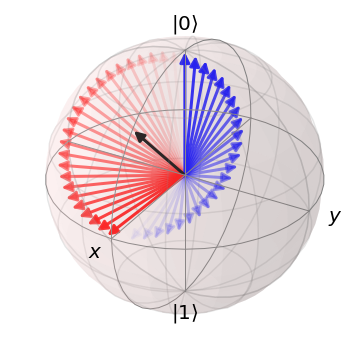

<p style="font-size:10px;font-style:italic;text-align:right"><a href="https://physics.stackexchange.com/questions/313959/visual-interpretation-on-the-bloch-sphere-when-hadamard-gate-is-applied-twice" target="_blank">Imagen obtenida de Physics StackExchange</a></p>

La compuerta Hadamard también puede ser expresada como una rotación de $90^{\circ}$ alrededor del eje $y$, seguida de una rotación de $180^{\circ}$ alrededor del eje $x$, que también se expresa como $H=XY^{1/2}$

Su representación matricial es,

$$H =\frac{1}{\sqrt{2}} \mymatrix{rr}{1 & 1 \\ 1 & -1} = \mymatrix{rr}{\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}}}$$

<div class="alert alert-block alert-info">
<strong>Ejemplo</strong>: Efecto de la compuerta $H$ sobre el estado $\ket{-}$

Con notación de Dirac:
    
$$\begin{aligned}
H\ket{-} &=H \, \left(\dfrac{1}{\sqrt2}\Big(\ket{0}-\ket{1}\Big)\right)=\dfrac{1}{\sqrt2}\Big(H\ket{0}-H\ket{1}\Big)\\
&=\dfrac{1}{\sqrt2}\left[\left(\dfrac{1}{\sqrt2}\Big(\ket{0}+\ket{1}\Big)\right)-\left(\dfrac{1}{\sqrt2}\Big(\ket{0}-\ket{1}\Big)\right)\right]\\
&=\dfrac{1}{2}\Big(\ket{0}+\ket{1}-\ket{0}+\ket{1}\Big)=\dfrac{1}{2}\Big(2\ket{1}\Big)=\ket{1}
\end{aligned}$$
    
Con notación matricial:
    
$$H\ket{-}=\mymatrix{rr}{\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}}}\mymatrix{rr}{ \frac{1}{\sqrt{2}} \\ -\frac{1}{\sqrt{2}} }=\frac{1}{2}\mymatrix{r}{ 1-1 \\ 1+1 }=\frac{1}{2}\mymatrix{r}{ 0 \\ 2 }=\mymatrix{r}{ 0 \\ 1 }=\ket{1}$$

En Qiskit aplicamos la compuerta $H$ con el método `h()`:

<a id="4.2.4"></a>
### 4.2.4.  Más compuertas

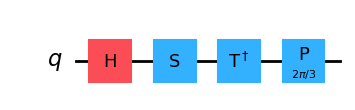


🔵 Estado inicial |+>:


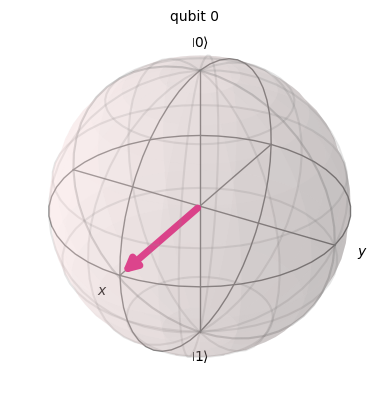

🔵 Estado después de S:


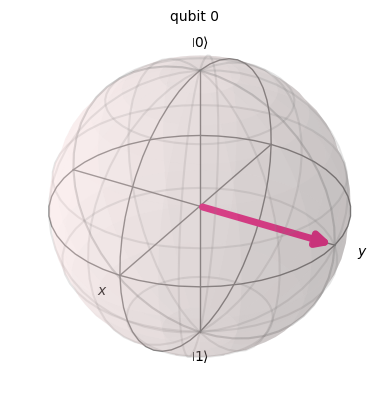

🔵 Estado después de T†:


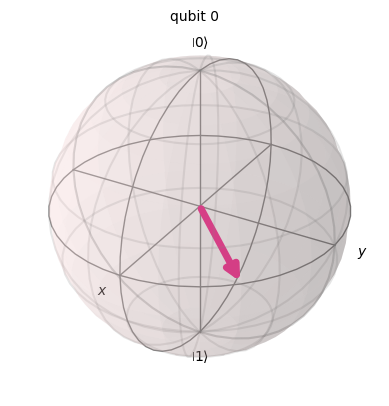

🔵 Estado después de P(2*pi/3):


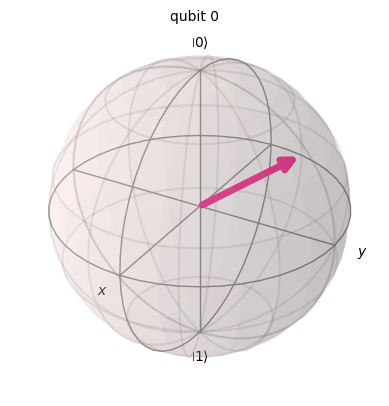

In [11]:
import numpy as np

circ6 = QuantumCircuit(1)    # circuito con 1 qubit

circ6.h(0)                   # nos movemos al estado |+>

psi_0 = Statevector(circ6)   # estado justo después de crear el circuito y posicionarse en |+>

circ6.s(0)                   # aplicar compuerta S, rotando pi/2

psi_1 = Statevector(circ6)   # estado justo después de aplicar P

circ6.tdg(0)                 # aplicar compuerta T† rotanfo -pi/4

psi_2 = Statevector(circ6)   # estado después aplicar la compuerta S

circ6.p(2*np.pi/3, 0)        # aplicar compuerta P, rotando 2pi/3

psi_3 = Statevector(circ6)   # estado después aplicar la compuerta T†

display(circ6.draw('mpl'))   # mostrar el circuito

print()
print("🔵 Estado inicial |+>:")
display(plot_bloch_multivector(psi_0))

print("🔵 Estado después de S:")
display(plot_bloch_multivector(psi_1))

print("🔵 Estado después de T†:")
display(plot_bloch_multivector(psi_2))

print("🔵 Estado después de P(2*pi/3):")
display(plot_bloch_multivector(psi_3))

<a id="4.3"></a>
## 4.3. Compuertas de múltiples qubits

<a id="4.3.1"></a>
### 4.3.1. Sistemas con más de un qubit

Hemos visto algunos efectos con qubits individuales y compuertas de un qubit, pero el verdadero poder de la computación cuántica se realiza a través de las interacciones entre qubits. Ahora, presentaremos compuertas de múltiples qubits y exploraremos comportamientos interesantes de los sistemas multi-qubit.

Por lo general, las compuertas que se pueden **implementar directamente en el hardware actuarán solo en uno o dos qubits**. En nuestros circuitos, podemos querer usar compuertas complejas que actúen sobre una gran cantidad de qubits. Afortunadamente, esto no será un problema. Con las compuertas de uno y dos qubits que nos proporciona el hardware, es posible construir cualquier otra compuerta.

<a id="3.3.2"></a>
### 4.3.2. Estados multi-qubit

La dimensión del espacio de Hilbert para $n$ qubits está dado por $2^n$. Para obtenerlo se usa el **producto tensorial** (o *[producto de Kronecker](https://en.wikipedia.org/wiki/Kronecker_product)*).

El producto tensorial, denotado por $\otimes$, se puede aplicar a vectores y matrices (en general a [tensores](https://en.wikipedia.org/wiki/Tensor)). Actúa como sigue,

$$\vec{a}\otimes\vec{b} =\mymatrix{r}{ a_1 \\ a_2 }\otimes\mymatrix{r}{ b_1 \\ b_2 }=\mymatrix{r}{ a_1\mymatrix{r}{ b_1 \\ b_2 } \\ a_2\mymatrix{r}{ b_1 \\ b_2 } }=\mymatrix{r}{ a_1b_1 \\ a_1b_2 \\ a_2b_1 \\ a_2b_2 }$$

$$C\otimes D =\mymatrix{r}{ c_{11} & c_{12} \\ c_{21} & c_{22} }\otimes\mymatrix{r}{ d_{11} & d_{12} \\ d_{21} & d_{22} }=\mymatrix{r}{ c_{11}\mymatrix{r}{ d_{11} & d_{12} \\ d_{21} & d_{22} } & c_{12}\mymatrix{r}{ d_{11} & d_{12} \\ d_{21} & d_{22} } \\ c_{21}\mymatrix{r}{ d_{11} & d_{12} \\ d_{21} & d_{22} } & c_{22}\mymatrix{r}{ d_{11} & d_{12} \\ d_{21} & d_{22} } }=\mymatrix{r}{ c_{11}d_{11} & c_{11}d_{12} & c_{12}d_{11} & c_{12}d_{12} \\ c_{11}d_{21} & c_{11}d_{22} & c_{12}d_{21} & c_{12}d_{22} \\ c_{21}d_{11} & c_{21}d_{12} & c_{22}d_{11} & c_{22}d_{12} \\ c_{21}d_{21} & c_{21}d_{22} & c_{22}d_{21} & c_{22}d_{22} }$$

### El espacio de 2 qubits

El espacio de Hilbert de un estado cuántico formado por dos qubits, $n=2$, tendrá una dimensión de $2^2=4$. Por ejemplo, el estado formado por dos qubits, cada uno en el estado $\ket{0}$ es,

$$\ket{0}\otimes\ket{0}=\ket{00}=\mymatrix{r}{ 1 \\ 0 }\otimes\mymatrix{r}{ 1 \\ 0 } =\mymatrix{r}{ 1\mymatrix{r}{ 1 \\ 0 } \\ 0\mymatrix{r}{ 1 \\ 0 } }=\mymatrix{r}{ 1 \\ 0 \\ 0 \\ 0 }$$

Ahora, considerando todas las posibles combinaciones de los estados base para cada uno de los dos qubits, tenemos que,

$$\ket{0}\otimes\ket{0}=\ket{00} =\mymatrix{r}{ 1 \\ 0 \\ 0 \\ 0 }$$

$$\ket{0}\otimes\ket{1}=\ket{01} =\mymatrix{r}{ 0 \\ 1 \\ 0 \\ 0 }$$

$$\ket{1}\otimes\ket{0}=\ket{10} =\mymatrix{r}{ 0 \\ 0 \\ 1 \\ 0 }$$

$$\ket{1}\otimes\ket{1}=\ket{11} =\mymatrix{r}{ 0 \\ 0 \\ 0 \\ 1 }$$

Notemos que debido a que estamos usando la *base computacional* para los qubits, podemos tener una relación directa con la representación de los números decimales en binario; es decir, el estado $\ket{00}$ tiene un $1$ en la posición $0$ del vector de estado de cuatro elementos, el estado $\ket{10}$ tienen un $1$ en la posición $2$ (contando desde cero), pues se cumple que $10_{binario} = 2_{decimal}$.


### El espacio de 3 qubits

Para el caso de $n=3$, tenemos que la dimensión es $2^3=8$, entonces los vectores de estado para este espacio de Hilbert, en la base computacional, serían:

$$\ket{000}=\mymatrix{r}{ 1 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 }, ~~~~ \ket{001}=\mymatrix{r}{ 0 \\ 1 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 }, ~~~~ \ket{010}=\mymatrix{r}{ 0 \\ 0 \\ 1 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 }, ~~~~ \ket{011}=\mymatrix{r}{ 0 \\ 0 \\ 0 \\ 1 \\ 0 \\ 0 \\ 0 \\ 0 }$$

$$\ket{100}=\mymatrix{r}{ 0 \\ 0 \\ 0 \\ 0 \\ 1 \\ 0 \\ 0 \\ 0 }, ~~~~ \ket{101}=\mymatrix{r}{ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 1 \\ 0 \\ 0 }, ~~~~ \ket{110}=\mymatrix{r}{ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 1 \\ 0 }, ~~~~ \ket{111}=\mymatrix{r}{ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 1 }$$

<a id="4.3.3"></a>
### 4.3.3. Compuertas de un qubit en estados multi-qubit

Las compuertas de un solo qubit que actúan en estados multi-qubit, deben tener la dimension correcta para poder efectuar la multiplicación matriz por vector.

Si por ejemplo tenemos esto: $H\ket{q_1q_0}$, no se puede saber a cual de los dos qubits se le debe aplicar la compuerta $H$ si a $\ket{q_1}$ o a $\ket{q_0}$, entonces se debe ser explícito. Si lo que se desea es aplicar $H$ al $\ket{q_0}$ se debe escribir:

$$I\otimes H \; \ket{q_1q_0}$$

Lo que implica que se aplicará la compuerta *identidad* al $\ket{q_1}$, es decir, no será afectado.

La compuerta $I\otimes H$ a aplicar al estado de 2 qubits es:

$$I\otimes H =\mymatrix{r}{ 1 & 0 \\ 0 & 1 }\otimes\mymatrix{rr}{\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}}}=\mymatrix{r}{ 1\mymatrix{rr}{\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}}} & 0\mymatrix{rr}{\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}}} \\ 0\mymatrix{rr}{\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}}} & 1\mymatrix{rr}{\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}}} }=\mymatrix{rrrr}{ \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} & 0 & 0 \\ \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} & 0 & 0 \\ 0 & 0 & \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\ 0 & 0 & \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} }$$

En Qiskit podemos usar la clase `Operator` para obtener el operador equivalente a las compuertas agregadas a un circuito, veamos le ejemplo anterior:

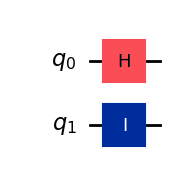

<IPython.core.display.Latex object>

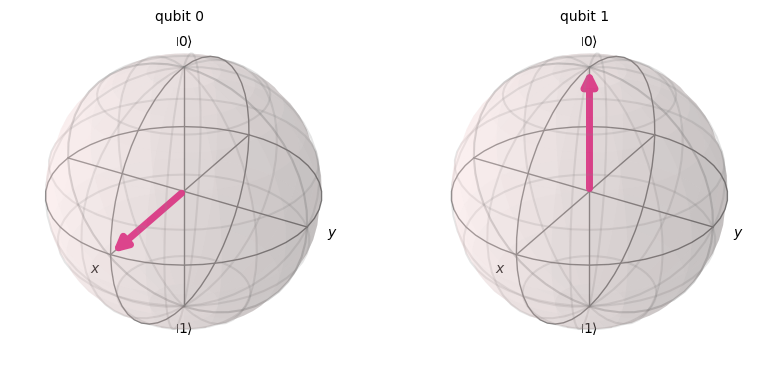

In [12]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import array_to_latex
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Operator

circuit = QuantumCircuit(2) # circuito con 2 qubits

circuit.h(0)    # Hadamard en q0
circuit.id(1)   # Identidad en q1

display(circuit.draw('mpl'))

op = Operator(circuit)
display(array_to_latex(op))

psi = Statevector(circuit)

display(plot_bloch_multivector(psi))

Ejemplo con $3$ qubits $\ket{q_2 \, q_1 \, q_0}$:

$$H\otimes R_y(3\pi/5) \otimes R_x(\pi/4) \; \ket{000}$$

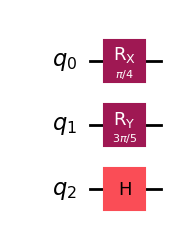

<IPython.core.display.Latex object>

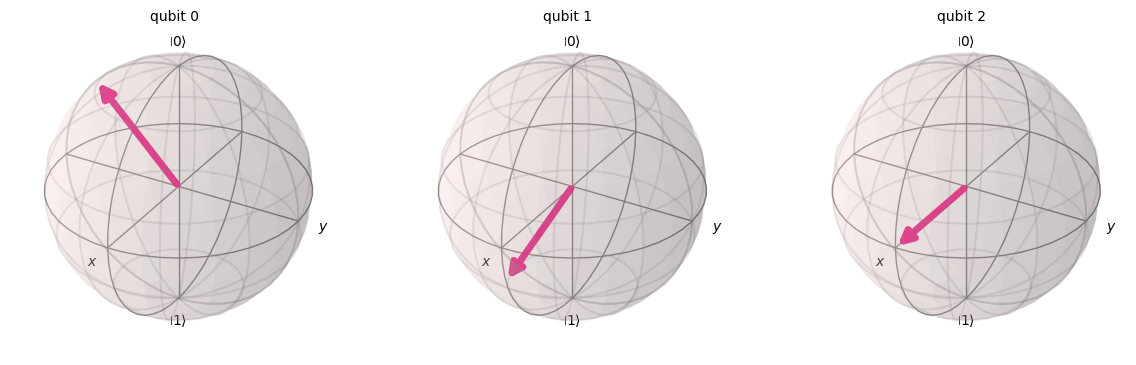

In [13]:
import numpy as np

circuit = QuantumCircuit(3) # circuito con 3 qubits

circuit.rx(np.pi/4, 0)      # Rx de pi/4  al q0
circuit.ry(3*np.pi/5, 1)    # Ry de 3pi/5 al q1
circuit.h(2)                # Hadamard al q2

display(circuit.draw('mpl'))

op = Operator(circuit)
display(array_to_latex(op))

psi = Statevector(circuit)

print()
display(plot_bloch_multivector(psi))

**Nota**: Si se aplica la misma compuerta a todos los qubits de un estado, se puede indicar con un subíndice, como por ejemplo, la compuerta $H_2=H\otimes H$ es aplicada a dos qubits: $H_2 \, \ket{00}=H\otimes H \, \ket{0}\otimes\ket{0}$ y de la misma manera, se tiene que,

$$H_n \, \underbrace{\ket{0...0}}_{n~qubits}=\underbrace{H\otimes\cdots\otimes H}_{n~Hadamards} \, \underbrace{\ket{0...0}}_{n~qubits}$$

Notaciones usadas:

$$\underbrace{H\otimes\cdots\otimes H}_{n~veces}=\bigotimes_1^n H=H^{\otimes n}=H_n$$

<a id="4.3.4"></a>
### 4.3.4. Compuertas de dos qubits

Ahora que ya sabemos cómo son los estados multi-qubit, podemos revisar las compuertas que son aplicadas a más de un qubit. Primero veamos algunas compuertas que necesitan dos qubits para operar.

#### Compuerta $CNOT$ o $CX$

Se trata de una compuerta controlada, actúa sobre dos qubits, en donde uno de ellos sirve como control y el otro como el objetivo. Se aplicará una operación $NOT$ o $X$ en el qubit objetivo, solo cuando el qubit control sea $\ket{1}$ y si no lo es, entonces el qubit objetivo permance sin cambio, por lo que, si el qubit de la izquierda ($\ket{q_1}$) es el control y el de la derecha ($\ket{q_0}$) es el objetivo, en el estado $\ket{q_1q_0}$, las transiciones son:

$$CNOT_{1,0}\ket{00}=\ket{00}$$
$$CNOT_{1,0}\ket{01}=\ket{01}$$
$$CNOT_{1,0}\ket{10}=\ket{11}$$
$$CNOT_{1,0}\ket{11}=\ket{10}$$

donde los subíndices en $CNOT$ indican el qubit control y el objetivo, en ese orden.

Dado esto podríamos tener otra versión del $CNOT$ en donde el qubit control sea $q_0$ y el objetivo sea $q_1$, las transiciones para este caso serían,

$$CNOT_{0,1}\ket{00}=\ket{00}$$
$$CNOT_{0,1}\ket{01}=\ket{11}$$
$$CNOT_{0,1}\ket{10}=\ket{10}$$
$$CNOT_{0,1}\ket{11}=\ket{01}$$

El order predeterminado en la mayoría de las referencias es que el qubit de la izquierda es el control, mientras que el de la derecha es el objetivo.

En Qiskit se cuenta con el método `cx(c, t)`, que recibe el qubit de control como primer parámetro y el qubit objetivo como segundo parámetro.

Este es el caso para CNOT(0,1)|01> = |11>


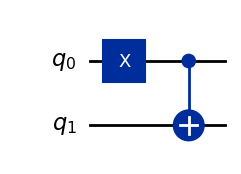

<IPython.core.display.Latex object>

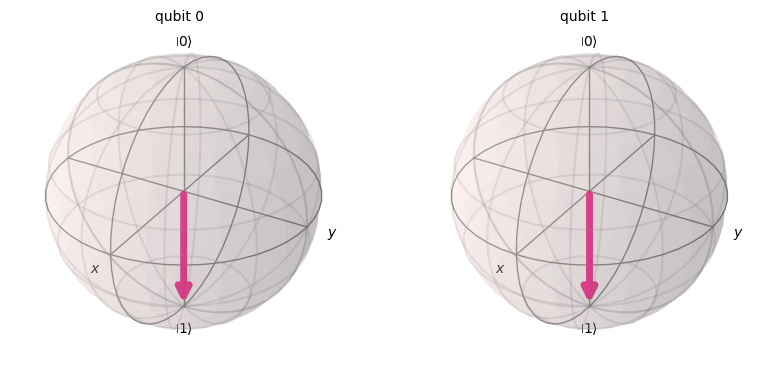

In [14]:
circ7 = QuantumCircuit(2)   # circuito con 2 qubits

circ7.x(0)                  # ponemos el control en |1> para que la compuerta sea aplicada

circ7.cx(0, 1)              # CNOT con q0 como control y q1 como objetivo

print("Este es el caso para CNOT(0,1)|01> = |11>")

display(circ7.draw('mpl'))

op = Operator(circ7)
display(array_to_latex(op))

psi = Statevector(circ7)

print()
display(plot_bloch_multivector(psi))

Este es el caso para CNOT(1,0)|10> = |11>


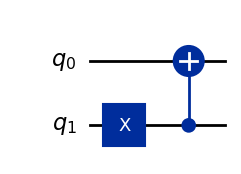

<IPython.core.display.Latex object>

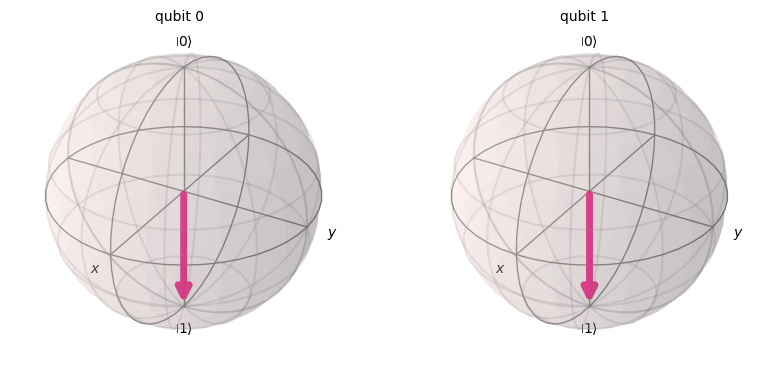

In [15]:
circ8 = QuantumCircuit(2)   # circuito con 2 qubits

circ8.x(1)                  # ponemos el control en |1> para que la compuerta sea aplicada

circ8.cx(1, 0)              # CNOT con q1 como control y q0 como objetivo

print("Este es el caso para CNOT(1,0)|10> = |11>")

display(circ8.draw('mpl'))

op = Operator(circ8)
display(array_to_latex(op))

psi = Statevector(circ8)

print()
display(plot_bloch_multivector(psi))

#### Compuertas controladas

Así como podemos controlar si aplicar la compuerta $X$ de acuerdo al estado de un qubit control, podemos controlar cualquier otra compuerta. Si tenemos la compuerta $U$, su versión controlada sería $CU$, y podemos decidir cual qubit es el control y cual es el objetivo (como para el caso de $CNOT$).

Una operación unitaria en general la podemos escribir como,

$$U =\mymatrix{rr}{ u_{11} & u_{12} \\ u_{21} & u_{22} }$$

Entonces su versión controlada $CU$, si el control es el qubit de la izquierda ($\ket{q_1}$), tendría las transiciones:

$CU_{1,0}\ket{00}=\ket{00}$

$CU_{1,0}\ket{01}=\ket{01}$

$CU_{1,0}\ket{10}=\ket{1}\otimes U\ket{0}=\ket{1}\otimes \left(u_{11}\ket{0}+u_{21}\ket{1}\right)$

$CU_{1,0}\ket{11}=\ket{1}\otimes U\ket{0}=\ket{1}\otimes \left(u_{12}\ket{0}+u_{22}\ket{1}\right)$

Su forma matricial es,

$$CU= \mymatrix{rrrr}{ 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & u_{11} & u_{12} \\ 0 & 0 & u_{21} & u_{22} }$$

En Qiskit existen varias compuertas controladas predefinidas, en el siguiente código se usarán algunas a modo de ejemplo:

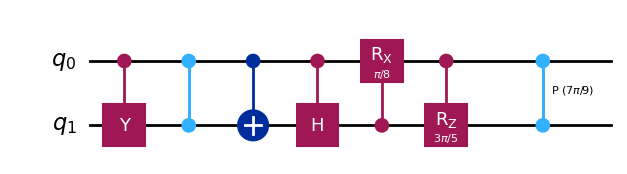

In [16]:
circ9 = QuantumCircuit(2)    # circuito con 2 qubits

circ9.cy(0, 1)               # Y controlada, qubit control es q0, y objetivo es q1
circ9.cz(1, 0)               # Z controlada, qubit control es q1, y objetivo es q0
circ9.cx(0, 1)               # X controlada, qubit control es q0, y objetivo es q1

circ9.ch(0, 1)               # H controlada, qubit control es q0, y objetivo es q1

circ9.crx(np.pi/8, 1, 0)     # Rx controlada, ángulo de pi/8, qubit control es q1, y objetivo es q0
circ9.crz(3*np.pi/5, 0, 1)   # Rz controlada, ángulo de 3pi/5, qubit control es q0, y objetivo es q1

circ9.cp(7*np.pi/9, 1, 0)    # P controlada, ángulo de 7pi/9, qubit control es q1, y objetivo es q0

display(circ9.draw('mpl'))

#### Compuerta $SWAP$

Esta compuerta es la única compuerta de dos qubits que no representa una operación controlada. $SWAP$ simplemente intercambia dos qubits. Es muy útil cuando se tiene restricción fisica en las conexiones entre qubits.

Sus transiciones son entonces,

$$SWAP \, \ket{00}=\ket{00}$$
$$SWAP \, \ket{01}=\ket{10}$$
$$SWAP \, \ket{10}=\ket{01}$$
$$SWAP \, \ket{11}=\ket{11}$$

Su representación matricial es,

$$SWAP= \mymatrix{rrrr}{ 1 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 }$$

La compuerta $SWAP$ puede descomponerse como,

$$SWAP = \frac{I\otimes I+X\otimes X+Y\otimes Y+Z\otimes Z}{2}$$

En Qsikit la podemos usar con `swap()` como sigue:

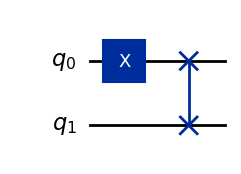


🔵 Estado inicial:


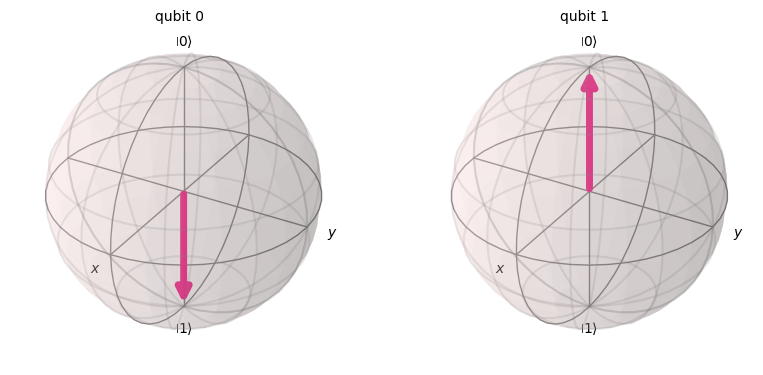

🔵 Estado después de SWAP:


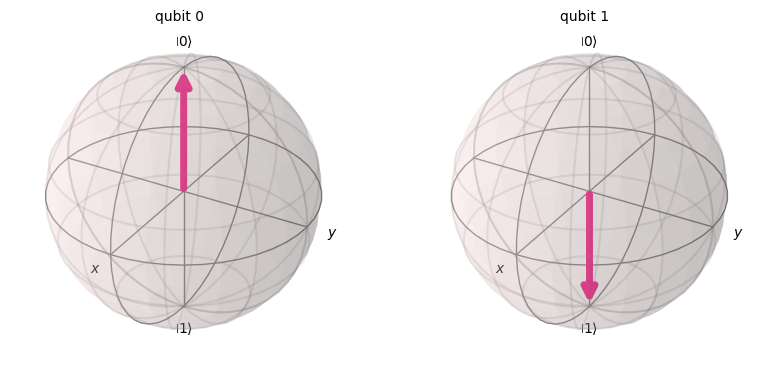

In [17]:
circ11 = QuantumCircuit(2)    # circuito con 2 qubit

circ11.x(0)                   # obtener el estado |01>

psi_0 = Statevector(circ11)   # estado justo después de crear el circuito e iniciar el qubit en |01>

circ11.swap(0, 1)             # aplicar compuerta SWAP a los dos quibits existentes

psi_1 = Statevector(circ11)   # estado después aplicar la compuerta Z

display(circ11.draw('mpl'))   # mostrar el circuito

print()
print("🔵 Estado inicial:")
display(plot_bloch_multivector(psi_0))

print("🔵 Estado después de SWAP:")
display(plot_bloch_multivector(psi_1))

<a id="4.3.5"></a>
### 4.3.5. Compuertas de más qubits

Las compuertas pueden estar definidas para $n$ cantidad de qubits, siempre y cuando su matriz sea unitaria. Las compuertas de más de dos qubits suelen ser compuertas con más de un control.

### Compuerta Toffoli , $CCNOT$ o $CCX$

Es una compuerta de 3 qubits. Aplicará un $NOT$ si los dos qubits de control están en el estado $\ket{1}$, en caso contrario no aplicará ninguna operación.

Su forma matricial para el caso de que los dos qubits de la izquierda sean los controles, y el de más a la derecha sea el objetivo es como sigue,

$$CCX =\mymatrix{cccccccc}{1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\ 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0}$$

Entonces sus transiciones son,

$$CCX \, \ket{000} = \ket{000}$$
$$CCX \, \ket{001} = \ket{001}$$
$$CCX \, \ket{010} = \ket{010}$$
$$CCX \, \ket{011} = \ket{011}$$
$$CCX \, \ket{100} = \ket{100}$$
$$CCX \, \ket{101} = \ket{101}$$
$$CCX \, \ket{110} = \ket{111}$$
$$CCX \, \ket{111} = \ket{110}$$

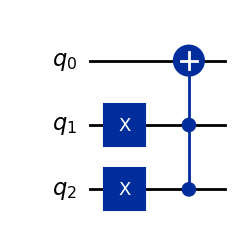


🔵 Estado inicial:


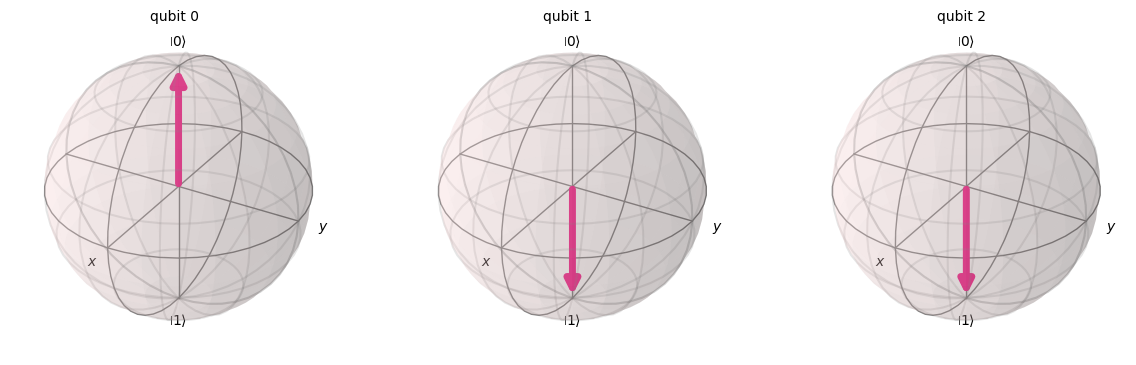

🔵 Estado después de CCX(1, 2, 0):


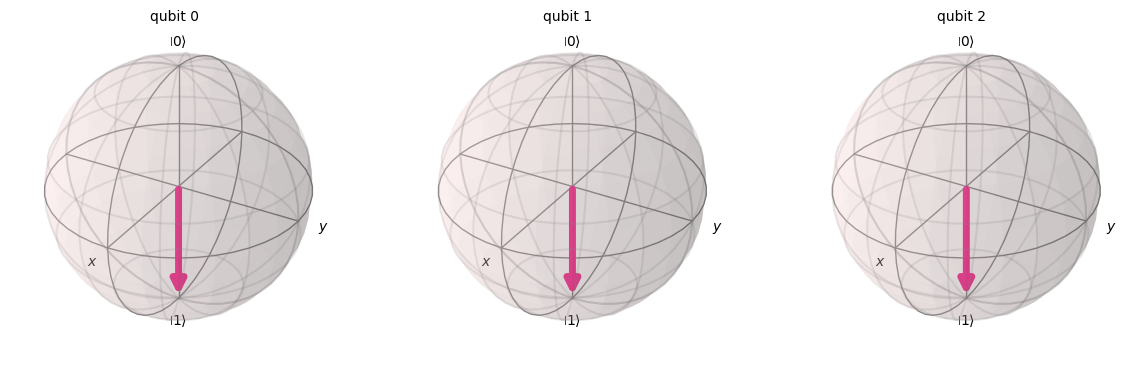

In [18]:
circ12 = QuantumCircuit(3)    # circuito con 3 qubit

circ12.x(1)                   # obtener el estado |010>
circ12.x(2)                   # obtener el estado |110>

psi_0 = Statevector(circ12)   # estado justo después de crear el circuito e iniciar el qubit en |110>

circ12.ccx(1, 2, 0)           # aplicar compuerta CCX: control1, control2, objetivo

psi_1 = Statevector(circ12)   # estado después aplicar la compuerta Z

display(circ12.draw('mpl'))   # mostrar el circuito

print()
print("🔵 Estado inicial:")
display(plot_bloch_multivector(psi_0))

print("🔵 Estado después de CCX(1, 2, 0):")
display(plot_bloch_multivector(psi_1))

#### Compuerta Fredkin o $CSWAP$

Esta compuerta tiene un qubit de control, y si está en el estado $\ket{1}$, entonces se efectúa un $SWAP$ a los dos quibits objetivo. La forma matricial es como sigue:

$$CSWAP =\mymatrix{cccccccc}{1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1}
$$

Entonces sus transiciones son,

$$CSWAP \ket{000} = \ket{000}$$
$$CSWAP \ket{001} = \ket{001}$$
$$CSWAP \ket{010} = \ket{010}$$
$$CSWAP \ket{011} = \ket{011}$$
$$CSWAP \ket{100} = \ket{100}$$
$$CSWAP \ket{101} = \ket{110}$$
$$CSWAP \ket{110} = \ket{101}$$
$$CSWAP \ket{111} = \ket{111}$$
    

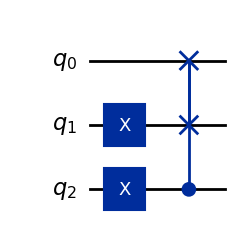


🔵 Estado inicial:


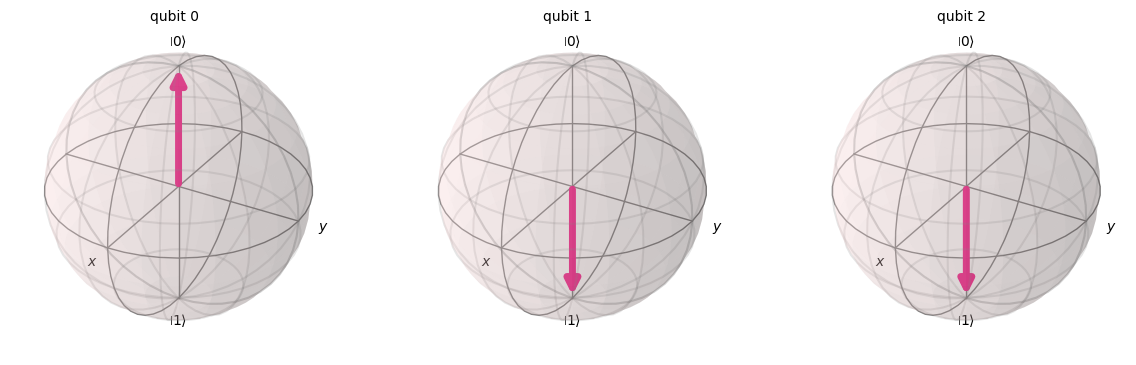

🔵 Estado después de SWAP(2, 0, 1):


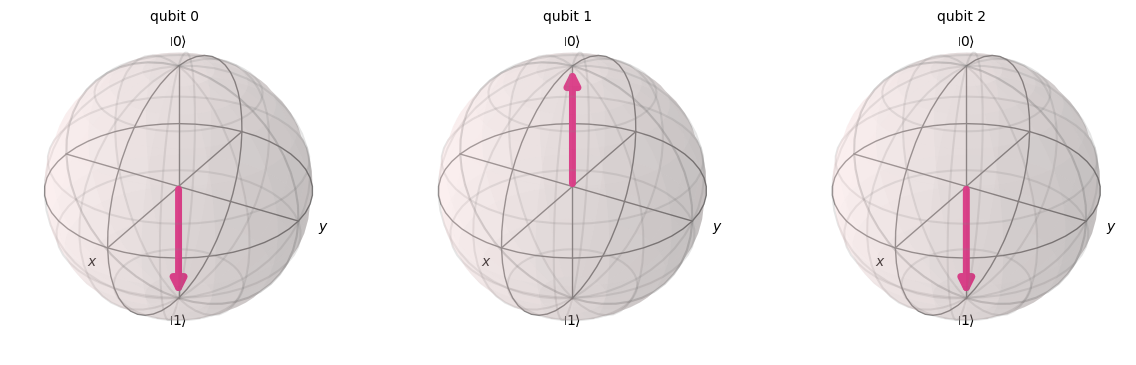

In [19]:
circ13 = QuantumCircuit(3)    # circuito con 3 qubit

circ13.x(2)                   # obtener el estado |100>
circ13.x(1)                   # obtener el estado |110>

psi_0 = Statevector(circ13)   # estado justo después de crear el circuito e iniciar el qubit en |110>

circ13.cswap(2, 0, 1)         # aplicar compuerta CCX: control1, objetivo1, objetivo2

psi_1 = Statevector(circ13)   # estado después aplicar la compuerta Z

display(circ13.draw('mpl'))   # mostrar el circuito

print()
print("🔵 Estado inicial:")
display(plot_bloch_multivector(psi_0))

print("🔵 Estado después de SWAP(2, 0, 1):")
display(plot_bloch_multivector(psi_1))

<a id="5"></a>
# 5. Simular circuitos cuánticos

Ya sabemos crear cicuitos y manipular sus qubits. Lo que sigue es ejecutar dichos circuitos y obtener las ventajas de la parte cuántica, es decir, permitir que las probabiliadades entren en juego al momento de observar los resultados.

Hasta ahora, hemos mostrado información sobre el estado final (e intermedios) suponiendo un circuito ideal y sin forzar un colapso del resutado, hemos visto el estado como si solo efectuaramos las operaciones matemáticas, comprobando que las mismas funcionan, pero no hemos hecho nada cuántico.

Sin embargo, un experimento real termina midiendo cada qubit (normalmente sobre la base computacional $\{\ket{0}, \ket{1}\}$). Sin medición, no podemos obtener información sobre el estado. **Las mediciones hacen que el sistema cuántico colapse en bits clásicos**.

Supongamos el siguiente estado de $3$ qubits, conocido como [estado GHZ](https://en.wikipedia.org/wiki/Greenberger%E2%80%93Horne%E2%80%93Zeilinger_state),

$$\ket{\psi}=\frac{1}{\sqrt2}\Big(\ket{000}+\ket{111}\Big)$$

Denotemos la cadena de bits resultane como $abc$. Recordemos que, bajo el etiquetado de qubits utilizado por Qiskit ($\ket{q_2q_1q_0}$), $a$ correspondería al resultado en el qubit 2, $b$ al resultado en el qubit 1, y $c$ al resultado en qubit 0.

Ahora, la probabilidad de obtener un resultado $abc$ viene dada por,

$$Pr(abc)=|\braket{abc}{\psi}|^2$$

En particular para el estado GHZ, la probabilidad de obtener $000$ o $111$ es $\frac{1}{2}$.

<div class="alert alert-block alert-info">
<strong>Ejemplo</strong>: Calcular la probabilidad de medir $111$ en el estado $\ket{\psi}=\frac{1}{\sqrt2}\Big(\ket{000}+\ket{111}\Big)$.

Utilizamos la ecuación indicada para calcular la probabilidad,
    
$$\begin{aligned}
\Pr(111)&=|\braket{111}{\psi}|^2\\
&=\left|\left\langle 111\Bigg|\frac{1}{\sqrt2}\Big(\ket{000}+\ket{111}\Big)\right\rangle\right|^2\\
&=\left|\frac{1}{\sqrt2}\left\langle 111\Bigg|\Big(\ket{000}+\ket{111}\Big)\right\rangle\right|^2\\
&=\left|\frac{1}{\sqrt2}\Bigg(\left\langle 111\Big|000\right\rangle+\left\langle 111\Big|111\right\rangle\Bigg)\right|^2\\
&=\left|\frac{1}{\sqrt2}\Big(0+1\Big)\right|^2\\
&=\left|\frac{1}{\sqrt2}\right|^2\\
&=\frac{1}{2}
\end{aligned}$$


Para poder simular un circuito, es necesario indicar que qubits queremos medir y elegir en dónde queremos guardar la medición, que serán bits clásicos y necesitamos uno por cada qubit a medir.

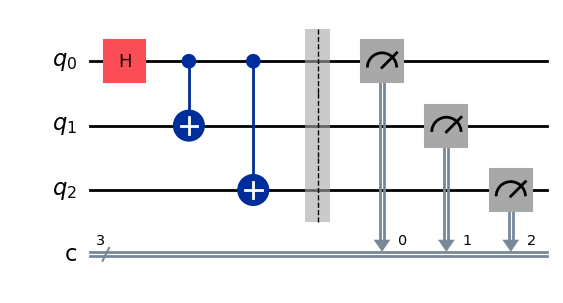

In [20]:
circ_ghz = QuantumCircuit(3, 3)     # circuito con 3 qubits y 3 bits clásicos

circ_ghz.h(0)                       # aplicar compuerta H al qubit 0
circ_ghz.cx(0, 1)                   # aplicar compuerta CNOT a los qubits 0 y 1
circ_ghz.cx(0, 2)                   # aplicar compuerta CNOT a los qubits 0 y 2
circ_ghz.barrier()
circ_ghz.measure([0,1,2], [0,1,2])  # medir los 3 qubits en los 3 bits clásicos

circ_ghz.draw('mpl')                # mostrar el circuito

Usamos la primitiva `Sampler` para medir los qubits en la base $Z$ (la base física en la que se miden los qubits). El `Sampler` contará el número de resultados del estado GHZ, normalizados por el número de iteraciones (shots) (experimentos realizados). El `Sampler` también ofrece la capacidad de realizar fácilmente la mitigación de errores, lo que modifica este cálculo y, por lo tanto, los resultados se denominan *cuasiprobabilidades*.

Las mediciones deben estar presentes en el circuito cuando se usa la primitiva `Sampler`, luego se crea una instancia de `Sampler` y se usa el método `run()` para enviar los circuitos al backend.

In [21]:
from qiskit.primitives import Sampler

sampler = Sampler()                   # crear objeto de tipo Sampler

job_sampler = sampler.run(circ_ghz)   # ejecutar el circuito usando Sampler

job_sampler.result().quasi_dists      # obtener las cuasi-probabilidades

[{0: 0.5, 7: 0.5}]

Graficamos los resultados usando un histograma:

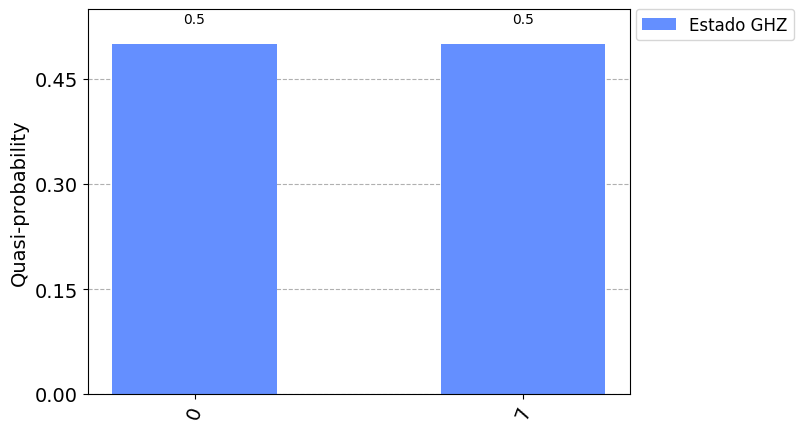

In [22]:
from qiskit.visualization import plot_histogram

legend = ["Estado GHZ"]
plot_histogram([job_sampler.result().quasi_dists[0]], legend=legend)

Notemos que los resultados tienen las etiquetas `0` y `7`, estas etiquetas representan el estado escrito usando la base decimal, y para saber el estado cuántico que representan, debemos calcular el valor en base binaria, es decir,

$$0_{decimal} = 000_{binario} \; \rightarrow \; \ket{000}$$

$$7_{decimal} = 111_{binario} \; \rightarrow \; \ket{111}$$

El resultado es aproximadamente la mitad para el estado $|000\rangle$ y la mitad para el estado $|111\rangle$, esto se debe a la definición del estado GHZ.

El resultado por defecto es dado con los valores en base decimal, sin embargo, es posible preguntar por los valores en base binaria como sigue:

In [23]:
job_sampler.result().quasi_dists[0].binary_probabilities()

{'000': 0.4999999999999999, '111': 0.4999999999999999}

<a id="5.1"></a>
## 5.1. Primitivas de Qiskit Runtime

En computación, una primitiva es una instrucción de procesamiento pequeña o un tipo de dato, para un nivel de abstracción dado. En pocas palabras, puedes pensar en las primitivas como los bloques de construcción más simples que se le puede dar a un usuario para crear algo útil. Desde la perspectiva del usuario, son cajas negras que “hacen algo que necesito pero no me importan los detalles específicos de cómo se logra”. Abstraen los detalles de implementación.

En el contexto de la computación cuántica, definir una capa de abstracción es un desafío en este momento, porque la mayoría de las aplicaciones de alto nivel requieren al menos cierto grado de cuidado con respecto a los aspectos de bajo nivel, como las especificaciones de hardware (mapas de acoplamiento, por ejemplo). Sin embargo, mientras la comunidad construye colectivamente un modelo computacional para un futuro de computación cuántica útil, han comenzado a surgir algunos candidatos para primitivas. Esto ha llevado a la creación de `Estimator` y `Sampler`.

Una primitiva `Estimator` calcula los valores esperados de los observables con respecto a los estados preparados por los circuitos cuánticos. Los usuarios generalmente especifican una lista de circuitos, observables y posiblemente alguna configuración adicional, con la cual el programa puede evaluar de manera eficiente los valores esperados y las variaciones.

Una primitiva `Sampler` calcula probabilidades o cuasiprobabilidades de cadenas de bits de circuitos cuánticos. Las cuasiprobabilidades son similares a las probabilidades regulares, excepto que pueden incluir valores negativos, lo que puede ocurrir cuando se usan ciertas técnicas de mitigación de errores.

Las primitivas en general permiten a un usuario de alto nivel escribir algoritmos cuánticos sin preocuparse por los detalles del hardware. Por lo tanto, las tareas no triviales, como la estimación de un operador, por ejemplo, se pueden manejar con un bajo nivel sin necesidad de que el usuario tenga que indicar todos los detalles.


<a id="6"></a>
# 6. Ejecutar en Hardware Cuántico

Para poder usar los dispositivos cuánticos en la nube, es necesario contar con una cuenta en la plataforma [IBM Quantum](https://quantum.ibm.com/).

Una vez que se ha creado la cuenta y se ha iniciado sesión, en la págna principal se debe generar un **Token**, el cual está formado por una cadena alfanumérica, la misma plataforma te permite copiar esta cadena (es muy larga), una vez que esté generada, se debe copiar y pegar en la celda de abajo sustituyendo `TOKEN` y luego se debe ejecutar el método `save_account()`.

**Nota**: no es necesario que se ejecute `save_account()` cada vez, con que se haga una vez será suficiente, incluso cuando pase mucho tiempo entre ejecuciones, el _token_ quedará guardado en disco duro. A menos que por alguna razón se regenere el _token_ entonces si será necesario volerlo a guardar.

Lo que si se debe hacer cada vez que se inicia un contexto, por ejemplo abrir un nuevo notebook, es cargar la cuenta y esto se lograr al crear un objeto de tipo `QiskitRuntimeService`.

El método `backends()` muestra la lista de los backends a los que se tiene acceso, de acuerdo al tipo de cuenta.

In [24]:
from qiskit_ibm_runtime import QiskitRuntimeService

# Guardar una cuenta de IBM Quantum en disco
#QiskitRuntimeService.save_account(channel="ibm_quantum", token='TOKEN')


# Leer credenciales desde el disco
service = QiskitRuntimeService()


service.backends() # listar todos los proveedores disponibles (para tu cuenta)

[<IBMBackend('simulator_mps')>,
 <IBMBackend('simulator_statevector')>,
 <IBMBackend('simulator_stabilizer')>,
 <IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_kyoto')>,
 <IBMBackend('ibm_osaka')>,
 <IBMBackend('ibmq_qasm_simulator')>,
 <IBMBackend('simulator_extended_stabilizer')>]

Los simuladores serán eliminados proximamente, así que concentrémonos en los dispositivos reales.

Para saber cuales son, podemos aplicar un filtro:

In [25]:
service.backends(simulator=False, operational=True, min_num_qubits=100)

[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_kyoto')>,
 <IBMBackend('ibm_osaka')>]

In [26]:
backend = service.backend(name="ibm_kyoto")

In [27]:
backend.num_qubits

127

Esos dispositivos enlistados están al alcance de todos aquellos que tengan una cuenta en la plataforma, por lo que usualmente hay que formarse para que un experimento sea ejecutado, esta formación cambia constatemente, si no es muy importante en qué dispositivo se desea ejecutar un circuito, simplemente se debe elegir un *backend*, pero si más bien lo que se desea es que se ejecute lo antes posible, se puede preguntar por el **dispositivo menos ocupado**, con el método `least_busy`.

In [28]:
backend_menos_ocupado = service.least_busy(operational=True, simulator=False)
backend_menos_ocupado

<IBMBackend('ibm_osaka')>

<a id="6.1"></a>
## 6.1. Ejemplo: Sumador Completo Cuántico

Una posible implementación de un sumador cuántico completo de 2 bits, usando compuertas $CNOT$ y compuertas *Toffoli* es la siguiente:

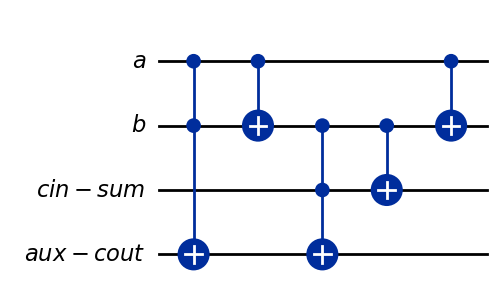

In [29]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

A = QuantumRegister(1, 'a')
B = QuantumRegister(1, 'b')
CarryIn = QuantumRegister(1, 'cin-sum')
cero = QuantumRegister(1, 'aux-cout')
adder = QuantumCircuit(A, B, CarryIn, cero)

adder.ccx(0, 1, 3)
adder.cx(0, 1)
adder.ccx(1, 2, 3)
adder.cx(1, 2)
adder.cx(0, 1)

adder.draw('mpl')

Ahora probemos el sumador anterior, inicializando los qubits de entrada `a`, `b` y `cin`, con un estado que corresponda a los bits que se desea sumar, con los estados $\ket{0}$ y $\ket{1}$, por ejemplo `a=1`, `b=0` y `cin=1`.

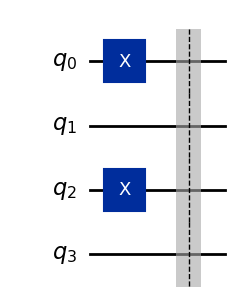

In [30]:
inicializacion = QuantumCircuit(4)

inicializacion.x(0)    # a   = 1
inicializacion.x(2)    # cin = 1
inicializacion.barrier()

inicializacion.draw('mpl')

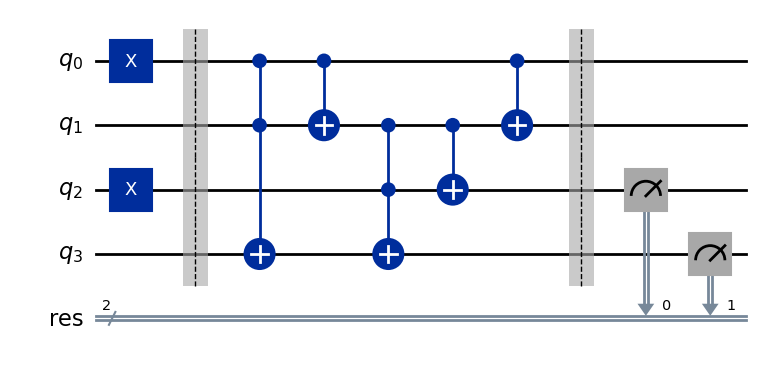

In [31]:
suma = inicializacion.compose(adder)

suma.barrier()

suma.add_register(ClassicalRegister(2, 'res'))

suma.measure([2, 3], [0, 1])

suma.draw('mpl')

Ejecutamos de manera local para comprobar el comportamiento del sumador:

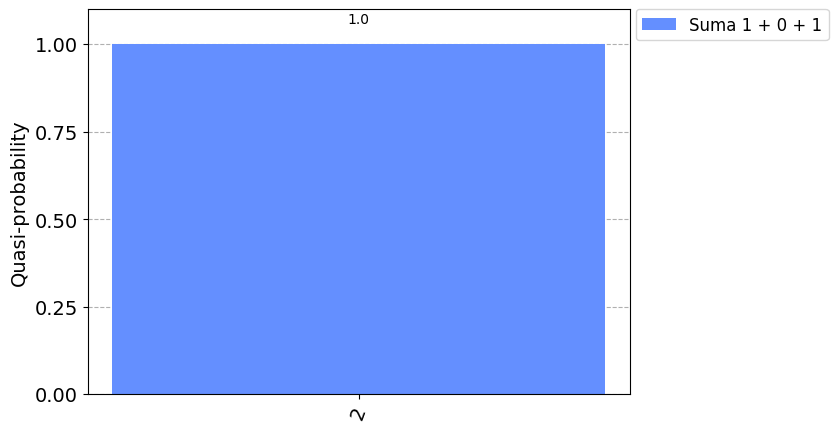

In [32]:
from qiskit.primitives import Sampler
from qiskit.visualization import plot_histogram

sampler = Sampler()
job_suma = sampler.run(suma)

legend = ["Suma 1 + 0 + 1"]
plot_histogram([job_suma.result().quasi_dists[0]], legend=legend)

La ejecución en un dispositivo real requiere que se realice una transpilación previa, debido a que los dispositivos reales solamente aceptan cierto conjunto de compuertas, esto se logra pasando el circuito por la función `generate_preset_pass_manager()`; más detalles [aquí](https://docs.quantum.ibm.com/transpile). 

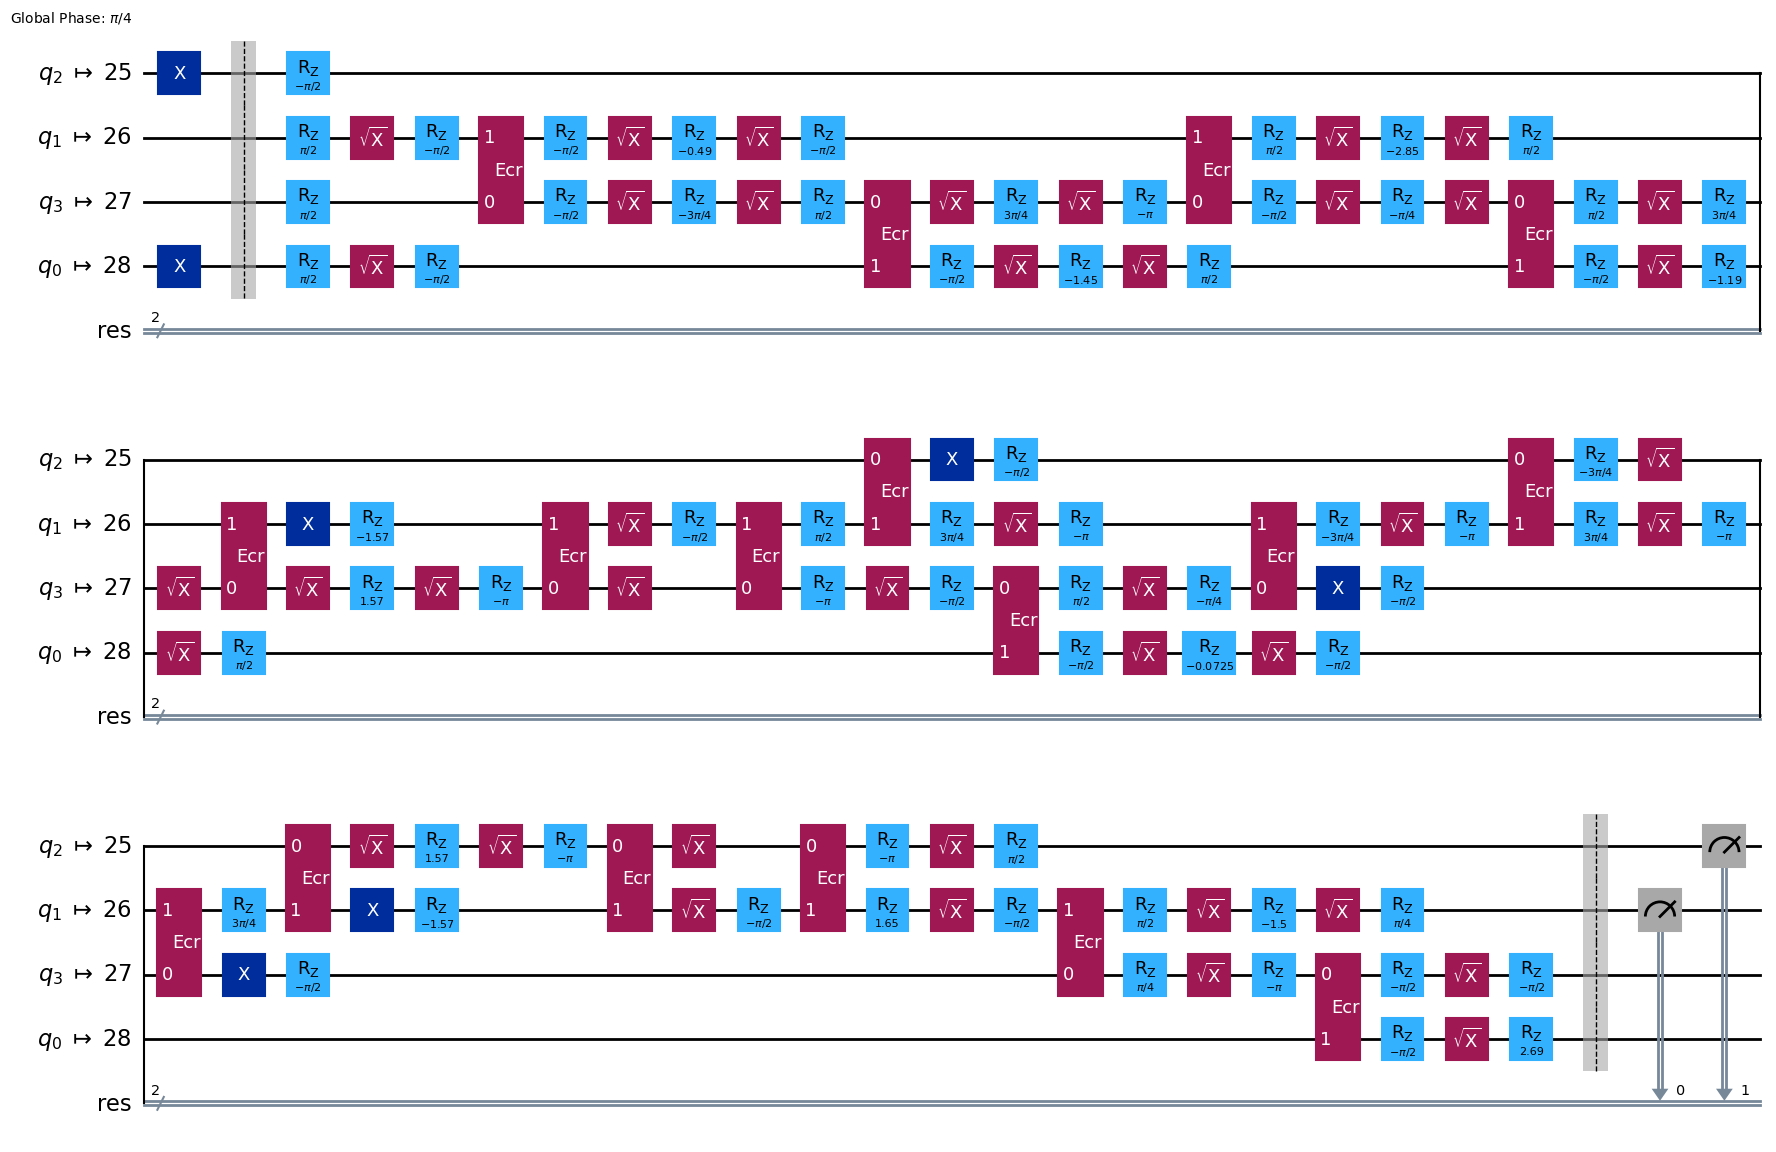

In [33]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

pass_manager = generate_preset_pass_manager(optimization_level=3, backend=backend_menos_ocupado)

circuito_transpilado = pass_manager.run(suma)

circuito_transpilado.draw('mpl', idle_wires=False)

En el siguiente ejemplo se puede ver la ejecución en un dispositivo real, **puede tardar desde minutos hasta horas**, dependiendo del tamaño de la fila de espera, por lo que es muy importante ser pacientes.

Se peude elegir entre diferentes primitivas para ejecutar el circuito cuántico, más detalles [aquí](https://docs.quantum.ibm.com/run/primitives).

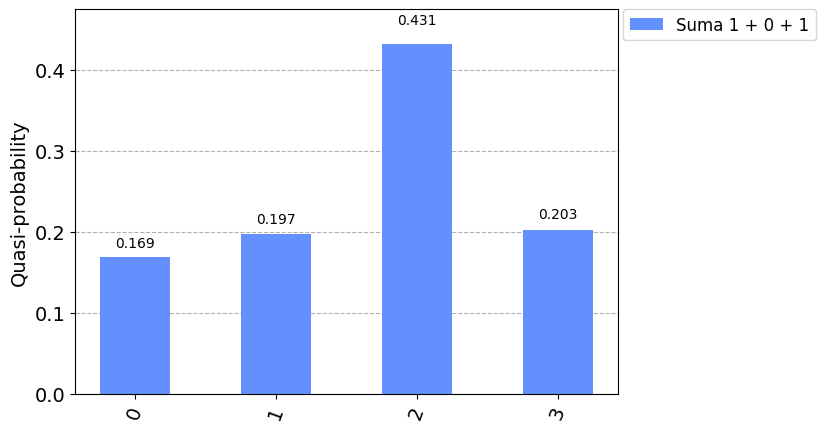

In [34]:
from qiskit_ibm_runtime import Sampler                   # usamos el Sampler adecuado

sampler = Sampler(backend=backend_menos_ocupado)
job_real_nube = sampler.run(circuito_transpilado)
result_real_nube = job_real_nube.result()

legend = ["Suma 1 + 0 + 1"]
plot_histogram([result_real_nube.quasi_dists[0]], legend=legend)

Podemos interrumpir la ejecución de la celda y recuperar el resultado de manera posterior. Para saber los trabajos (_jobs_) que hemos mandado ejecutar en un backend en particular, podemos hacer:

In [35]:
service.jobs(backend_name=backend_menos_ocupado.name, limit=3)  # obtener los último 3 jobs en ese backend

[<RuntimeJob('crdw21gnzrx00081vt6g', 'sampler')>,
 <RuntimeJob('crdvt083vh8g008ch70g', 'sampler')>,
 <RuntimeJob('crdvny7dqdn000835q20', 'sampler')>]

Conociendo el identificador del *job*, podemos preguntar por ese trabajo en particular y si ya ha terminado entonces podemos acceder a su resultado. También se pueden consultar los jobs que hemos mandado ejecutar desde la plataforma de IBM Quantum, en la [sección de *jobs*](https://quantum.ibm.com/jobs).

In [36]:
service.job('crdvt083vh8g008ch70g').result()

SamplerResult(quasi_dists=[{0: 0.19212739953559, 1: 0.199584639181893, 2: 0.381308301829317, 3: 0.226979659453199}], metadata=[{'shots': 4000, 'circuit_metadata': {}, 'readout_mitigation_overhead': 1.091604031323001, 'readout_mitigation_time': 0.006761475990060717}])